In [1]:
from nwbwidgets import nwb2widget
from nwbwidgets.misc import raster_widget, raster_grid_widget, psth_widget
from pynwb import NWBHDF5IO

In [2]:
fpath = '/Volumes/easystore5T/data/Steinmetz/Steinmetz2019_Cori_2016-12-14.nwb'
nwbfile = NWBHDF5IO(fpath, 'r', load_namespaces=True).read()

/Users/bendichter/opt/anaconda3/lib/python3.7/site-packages/hdmf/spec/namespace.py:470: UserWarning:

ignoring namespace 'hdmf-common' because it already exists

/Users/bendichter/opt/anaconda3/lib/python3.7/site-packages/hdmf/spec/namespace.py:470: UserWarning:

ignoring namespace 'core' because it already exists

/Users/bendichter/opt/anaconda3/lib/python3.7/site-packages/hdmf/spec/namespace.py:61: UserWarning:

Loaded namespace 'AIBS_ecephys' is missing the required key 'version'. Version will be set to 'None'. Please notify the extension author.



In [3]:
nwb2widget(nwbfile)

In [3]:
from nwbwidgets.misc import show_psth_raster, trials_psth, show_session_raster

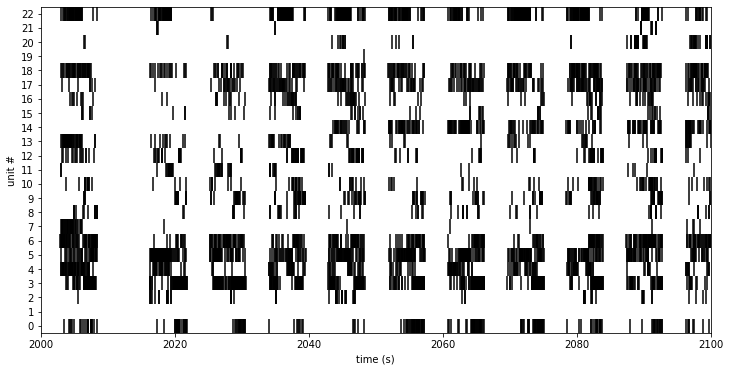

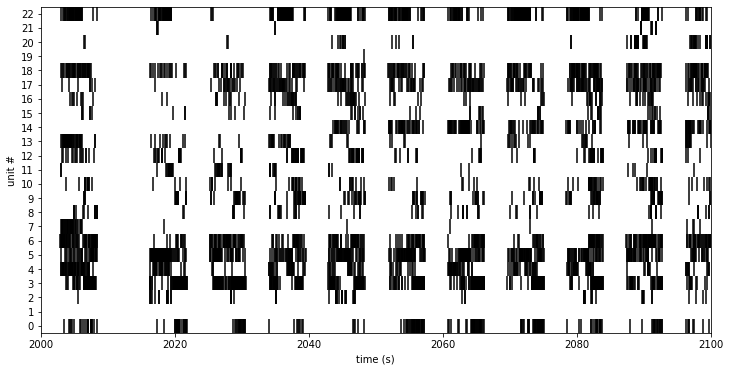

In [4]:
show_session_raster(nwbfile.units, time_window=[2000,2100])

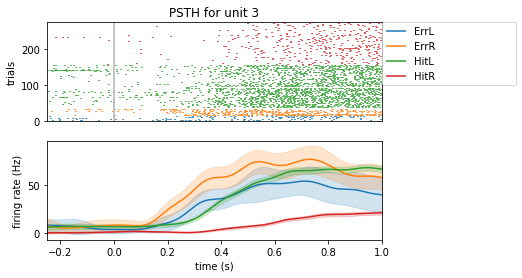

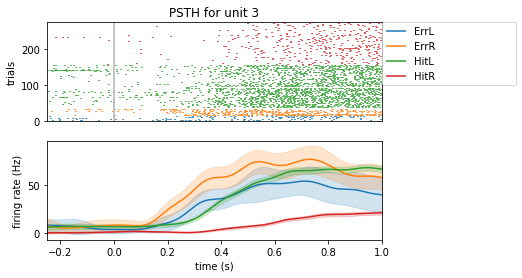

In [5]:
trials_psth(nwbfile.units, index=3, start_label='cue_time',
            group_by='response', before=.25, sigma_in_secs=.05)

In [6]:
trials_psth

<function nwbwidgets.misc.trials_psth(units: pynwb.misc.Units, index=0, start_label='start_time', before=0.0, after=1.0, order_by=None, group_by=None, trials_select=None, sigma_in_secs=0.05, ntt=1000)>

In [10]:
nwbfile.units.get_ancestor('NWBFile').trials

trials pynwb.epoch.TimeIntervals at 0x120898918224
Fields:
  colnames: ['start_time' 'stop_time' 'aa' 'bb' 'cc']
  columns: (
    start_time <class 'hdmf.common.table.VectorData'>,
    stop_time <class 'hdmf.common.table.VectorData'>,
    aa <class 'hdmf.common.table.VectorData'>,
    bb <class 'hdmf.common.table.VectorData'>,
    cc <class 'hdmf.common.table.VectorData'>
  )
  description: experimental trials
  id: id <class 'hdmf.common.table.ElementIdentifiers'>

In [8]:
from nwbwidgets.utils.units import align_by_times

In [3]:
import numpy as np

nwbfile.add_trial_column('aa', 'aa')
nwbfile.add_trial_column('bb', 'bb')
nwbfile.add_trial_column('cc', 'cc')
from itertools import cycle

for start, a, b, c in zip(np.linspace(5,500,120),
                          cycle([0,1]),
                          cycle([0,0,1,1]),
                          cycle([0,0,0,1,1,1])):
    nwbfile.add_trial(start_time=start, aa=a, bb=b, cc=c, stop_time=start+1)
    

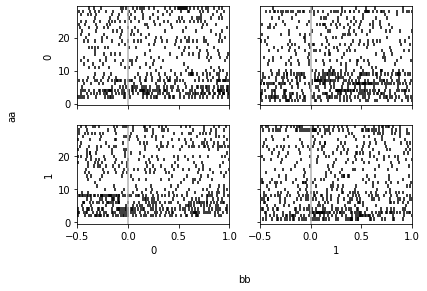

In [11]:
import numpy as np
from nwbwidgets.utils.units import align_by_time_intervals
from nwbwidgets.utils.dynamictable import get_group_inds_and_order
from nwbwidgets.misc import show_psth_raster



    
fig, axs, big_ax = raster_grid(nwbfile.units, nwbfile.trials, 3, .5, 1.,
                               cols_label='bb', rows_label='aa')



In [17]:
len(nwbfile.trials['aa'])

120

In [21]:
inds = np.array([True]*120)
inds

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [6]:
from h5py import File

In [19]:
f = File(fpath, 'r+')
del f['/processing/optotagging/optogenetic_stimuluation/name']

OSError: Unable to open file (file is already open for read-only)

In [21]:
f.close()

<Closed HDF5 file>

In [11]:
inds = np.array([0,1,0,1]).astype('bool')

In [12]:
inds

array([False,  True, False,  True])

In [8]:
infer_categorical_columns(nwbfile.units)

{'quality': array(['good', 'noise'], dtype=object)}

In [39]:
uvals = np.unique(nwbfile.trials['response'][:])


array(['ErrL', 'ErrR', 'HitL', 'HitR'], dtype=object)

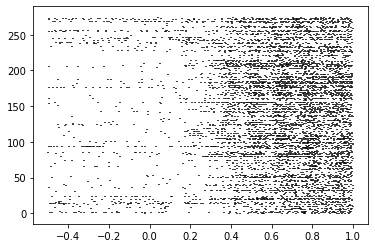

In [27]:
starts = nwbfile.trials['cue_time'][:]

do_raster(nwbfile.units, 3, starts, before=.5, after=1.)



In [41]:
nwbfile.trials

trials pynwb.epoch.TimeIntervals at 0x120762363536
Fields:
  colnames: ['start_time' 'stop_time' 'session_directory' 'pole_in_time'
 'pole_out_time' 'cue_time' 'response' 'lick_early' 'photo_stim_id']
  columns: (
    start_time <class 'hdmf.common.table.VectorData'>,
    stop_time <class 'hdmf.common.table.VectorData'>,
    session_directory <class 'hdmf.common.table.VectorData'>,
    pole_in_time <class 'hdmf.common.table.VectorData'>,
    pole_out_time <class 'hdmf.common.table.VectorData'>,
    cue_time <class 'hdmf.common.table.VectorData'>,
    response <class 'hdmf.common.table.VectorData'>,
    lick_early <class 'hdmf.common.table.VectorData'>,
    photo_stim_id <class 'hdmf.common.table.VectorData'>
  )
  description: experimental trials
  id: id <class 'hdmf.common.table.ElementIdentifiers'>